<a href="https://colab.research.google.com/github/saadmarwan16/tensorflow_exercise/blob/main/bank_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from pandas import read_csv
import matplotlib.pyplot as plt

In [2]:
# from google.colab import files
# files.upload()

In [3]:
df = read_csv('data_banknote_authentication.txt', header=None)
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
def split_data(X, Y):
    return train_test_split(X, Y, test_size=0.33, random_state=1)

In [5]:
dataset = df.values
dataset

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [6]:
X = dataset[:, :-1]
Y = dataset[:, -1]

In [7]:
X_train, X_test, y_train, y_test = split_data(X, Y)

In [8]:
N, D = X_train.shape

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=(D, ), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
29/29 [==============================] - 1s 8ms/step - loss: 0.6919 - accuracy: 0.6757 - val_loss: 0.3844 - val_accuracy: 0.8190
Epoch 2/20
29/29 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8575 - val_loss: 0.2360 - val_accuracy: 0.9404
Epoch 3/20
29/29 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9445 - val_loss: 0.1294 - val_accuracy: 0.9757
Epoch 4/20
29/29 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9597 - val_loss: 0.0730 - val_accuracy: 0.9912
Epoch 5/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9761 - val_loss: 0.0484 - val_accuracy: 0.9934
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.0700 - accuracy: 0.9750 - val_loss: 0.0356 - val_accuracy: 0.9956
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9859 - val_loss: 0.0280 - val_accuracy: 0.9956
Epoch 8/20
29/29 [==

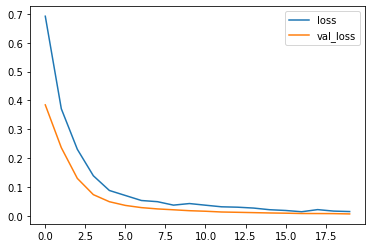

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [11]:
model.save('bank_notes_classifier.h5')